# k-nearest neighbour (KNN)
## Implementation

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class KNN():
    
    def __init__(self, X, y, neighbourSize = 5, distanceType = 0):
        
        self.X = X
        self.y = y
        self.neighbourSize = neighbourSize
        self.distanceType = distanceType
        
    def pred(self, Z):
        
        z_pred = np.zeros(Z.shape[0])
        
        # Pred each sample
        for i, z in enumerate(Z):
            d = np.zeros(self.X.shape[0])
            for j, x in enumerate(self.X):
                d[j] = self.distance(x, z, self.distanceType)
            
            # Sort distances
            d_sort_idxs = np.argsort(d)
            neighbourLabels = self.y[d_sort_idxs][:self.neighbourSize]
            
            vals, counts = np.unique(neighbourLabels, return_counts = True)
            z_pred[i] = vals[np.argmax(counts)]
            
        return z_pred
            
    def distance(self, x, y, distanceType, p = 2):
                
        if (distanceType == 0):
            return distance.euclidean(x, y)
        elif (distanceType == 1):
            return distance.cosine(x, y)
        elif (distance == 2):
            return distance.hamming(x, y)
        elif (distance == 3):
            return distance.minkowski(x, y, p)

# Finding optimal value of K
Determine the minimum value of k required to correctly estimate each training sample.

In [2]:
data = np.loadtxt("CleanDataNorm.csv", dtype = str, delimiter = ',')
y = data[1:, 23].astype(int)
X = data[1:, :23].astype(float)
X_headers = data[0, :].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X.shape

(13594, 23)

In [3]:
def getK_val_data(w, m, file_name):
    k_values = []
    for i, sample in enumerate(tqdm(X_train)):
        
        X_train_samples = np.delete(X_train, [i], axis = 0)
        y_train_samples = np.delete(y_train, [i], axis = 0)
        
        k = 0
        found_k = False
        
        while ((not found_k) and (k < (len(y_train_samples)))):
            k+= 1
            k_model = KNeighborsClassifier(n_neighbors = k, n_jobs = -1, weights = w, metric = m)
            k_model.fit(X_train_samples, y_train_samples)
    
            y_sample_pred = k_model.predict([sample])
            y_sample_true = y_train[i]
    
            #print(y_sample_pred == y_sample_true, k)
            if (y_sample_pred == y_sample_true):
                k_values.append(k)
                found_k = True
        
    k_values = np.array(k_values)
    np.savetxt(file_name, k_values)

#print(len(k_values), len(X_train))

In [ ]:
getK_val_data("uniform", "euclidean", "./K_data/k_data_uni_euc")
getK_val_data("distance", "euclidean", "./K_data/k_data_dist_euc")
getK_val_data("uniform", "manhattan", "./K_data/k_data_uni_man")
getK_val_data("distance", "manhattan", "./K_data/k_data_dist_man")
getK_val_data("uniform", "cosine", "./K_data/k_data_uni_cos")
getK_val_data("distance", "cosine", "./K_data/k_data_dist_cos")

 69%|████████████████████████▋           | 6985/10195 [4:29:34<11:38,  4.60it/s]

In [26]:
#for i in np.sort(k_values)[::-1]:
#    print(i)

k_vals = np.loadtxt("./K_data/k_data_dist_man")

#k_vals = k_vals[np.argwhere(k_vals > 1)][:, 0]
print(len(k_vals), len(X_train))
print(np.median(k_vals))
print(np.mean(k_vals))

#print(np.sort(k_vals))
np.percentile(k_vals, 99.9)

10065 10195
1.0
3.1124689518132143


257.16000000028

In [7]:
%%time
k_model = KNN(X_train, y_train, neighbourSize = 100, distanceType = 0)
accuracy_score(y_test, k_model.pred(X_test))

NameError: name 'KNN' is not defined

In [21]:
X_train_selected_features = X_train[:, [5, 10, 11, 13, 17, 20, 21, 22]]
print(X_headers[[5, 10, 11, 13, 17, 20, 21, 22]])

sk_k_model = KNeighborsClassifier(n_neighbors = 11, metric = "minkowski")
sk_k_model.fit(X_train_selected_features, y_train)
np.mean(cross_val_score(sk_k_model, X_train_selected_features, y_train, cv=5))
#accuracy_score(y_test, sk_k_model.predict(X_test))

['Eccentricity' 'Solidity' 'roundness' 'ShapeFactor1' 'ShapeFactor5'
 'Colour_brown' 'Colour_green' 'Colour_white']


0.9855811672388427

In [9]:
iris = load_iris()
iris_data = iris.data
iris_labels = iris.target

breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_labels = breast_cancer.target

#X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_labels, test_size = 0.25)
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, breast_cancer_labels, test_size = 0.25)

# Classification Tree

In [8]:
data = pd.read_csv("CleanDataDT.csv", na_values = "NA")
#data = data.fillna(0)
beans_lables = data["Class"].to_numpy()
beans_data = data.drop(["Class"], axis = 1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(beans_data, beans_lables, test_size = 0.25, random_state = 42)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

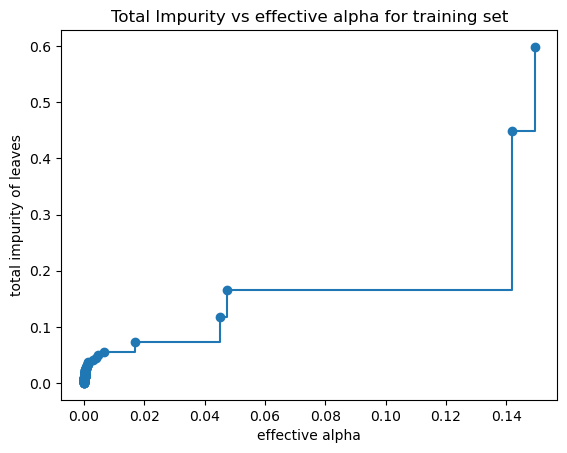

In [13]:
clf = tree.DecisionTreeClassifier(random_state=0, criterion = 'gini')
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [14]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, criterion = 'gini')
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2282519000857497


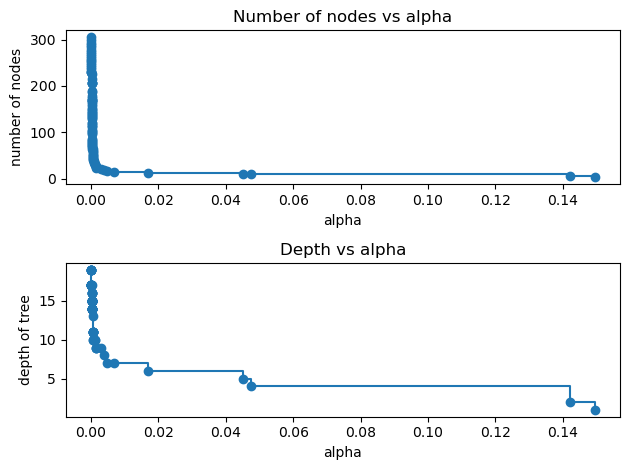

In [15]:


clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


50
0.9802883200941453
0.00025569575103660434


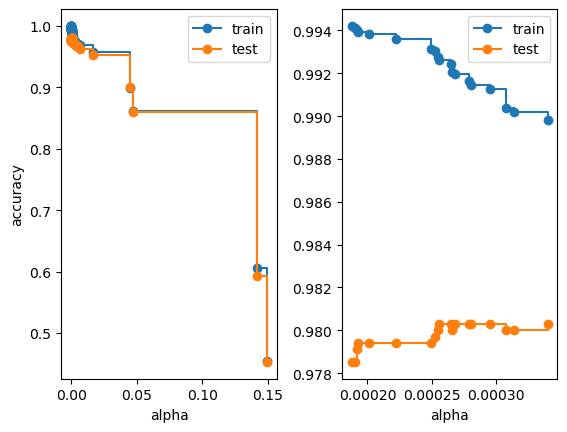

In [17]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

ccp_alphas = np.array(ccp_alphas)
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

m = np.argmax(test_scores)
print(m)
print(test_scores[m])
print(ccp_alphas[m])

best_alpha_range = np.r_[m-9:m,m,m+1:m+10]

plt.subplot(1, 2, 1),
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.legend()

plt.subplot(1, 2, 2),
plt.xlabel("alpha")
plt.plot(ccp_alphas[best_alpha_range], train_scores[best_alpha_range], marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas[best_alpha_range], test_scores[best_alpha_range], marker="o", label="test", drawstyle="steps-post")
plt.legend()
#plt.xticks([0.00018, 0.00022, 0.00026])

plt.subplots_adjust(wspace=0.3)
plt.savefig("CT_Gini_Plot.pdf", format="pdf", bbox_inches="tight")
plt.show()